# ================================
# 1. DEFINIÇÃO DO PROBLEMA
# ================================
# Este projeto tem como objetivo prever o possível campeão da Copa do Mundo de 2026
# utilizando dados históricos de partidas, dados climáticos simulados, e atributos
# relacionados ao desempenho dos jogadores e técnicos.
# O modelo escolhido é o Random Forest, e o objetivo é usar simulações avançadas
# para obter probabilidades dos possíveis vencedores.
# A simulação inclui cenários como lesões de jogadores, variações climáticas extremas
# e outros fatores que podem influenciar o desempenho dos times.


     Year              Datetime    Stage         Stadium         City  \
0  1930.0  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1  1930.0  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
2  1930.0  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    
3  1930.0  14 Jul 1930 - 14:50   Group 3         Pocitos  Montevideo    
4  1930.0  15 Jul 1930 - 16:00   Group 1  Parque Central  Montevideo    

  Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0         France              4.0              1.0         Mexico   
1            USA              3.0              0.0        Belgium   
2     Yugoslavia              2.0              1.0         Brazil   
3        Romania              3.0              1.0           Peru   
4      Argentina              1.0              0.0         France   

  Win conditions  Attendance  Half-time Home Goals  Half-time Away Goals  \
0                     4444.0                   3.0                   0

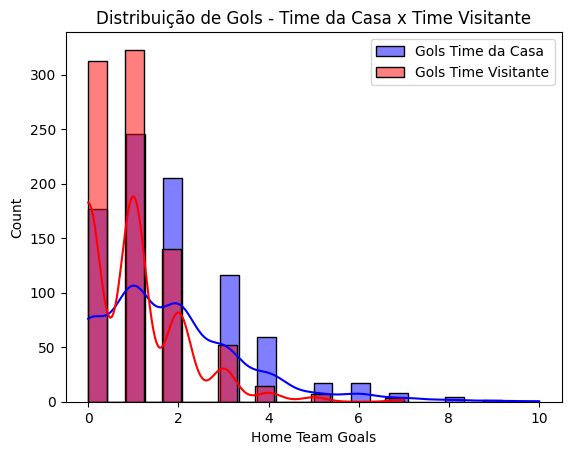

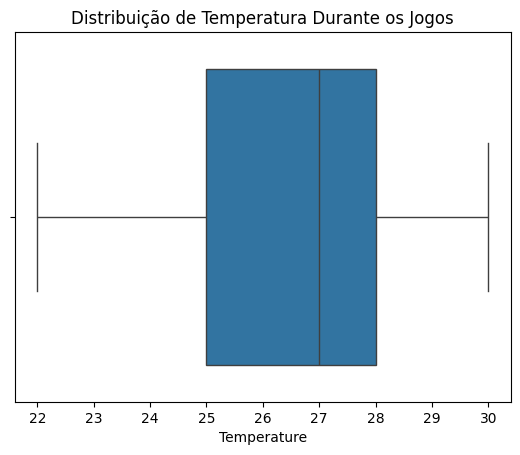

In [60]:
# ================================
# 2. ANÁLISE DE DADOS
# ================================
# Nesta seção, carregamos os dados de partidas, clima, técnicos e jogadores,
# e utilizamos gráficos para melhor visualizar a distribuição dos atributos.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar dados de partidas históricas
url_jogos = 'https://raw.githubusercontent.com/BrunoMaia23/Am/refs/heads/main/WorldCupMatches.csv'
df_jogos = pd.read_csv(url_jogos)

# Exibir primeiras linhas de dados
print(df_jogos.head())

# Plot de distribuição de gols dos times da casa e visitantes
sns.histplot(df_jogos['Home Team Goals'], kde=True, color='blue', label='Gols Time da Casa')
sns.histplot(df_jogos['Away Team Goals'], kde=True, color='red', label='Gols Time Visitante')
plt.title('Distribuição de Gols - Time da Casa x Time Visitante')
plt.legend()
plt.show()

# Dados climáticos simulados (a serem substituídos por dados reais conforme necessidade)
data_clima = {'Temperature': [25, 28, 22, 30, 27], 'Humidity': [60, 65, 70, 55, 75]}
df_clima = pd.DataFrame(data_clima)

# Gráfico de distribuição de temperaturas
sns.boxplot(data=df_clima, x='Temperature')
plt.title('Distribuição de Temperatura Durante os Jogos')
plt.show()

# Dados de técnicos e jogadores (simulados)
df_tecnicos = pd.DataFrame({'Títulos Técnico': [3, 2, 1, 5, 4], 'Aproveitamento Técnico': [85, 80, 70, 90, 75]})
df_jogadores = pd.DataFrame({'Overall': [89, 88, 85, 87, 86]})


In [61]:
# ================================
# 3. PRÉ-PROCESSAMENTO DOS DADOS
# ================================
# Aqui realizamos a codificação de variáveis categóricas, e preparamos os conjuntos
# de dados de treino e teste para serem usados no modelo de Random Forest.

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Codificar nomes dos times
label_encoder = LabelEncoder()
df_jogos['Home Team Encoded'] = label_encoder.fit_transform(df_jogos['Home Team Name'])
df_jogos['Away Team Encoded'] = label_encoder.fit_transform(df_jogos['Away Team Name'])

# Definir X (características) e y (rótulos)
X = df_jogos[['Home Team Encoded', 'Away Team Encoded', 'Home Team Goals', 'Away Team Goals']]
y = df_jogos.apply(lambda row: 'home' if row['Home Team Goals'] > row['Away Team Goals']
                   else 'away' if row['Home Team Goals'] < row['Away Team Goals']
                   else 'draw', axis=1)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Relatório de Classificação:
              precision    recall  f1-score   support

        away       1.00      1.00      1.00        39
        draw       1.00      1.00      1.00       762
        home       1.00      1.00      1.00       114

    accuracy                           1.00       915
   macro avg       1.00      1.00      1.00       915
weighted avg       1.00      1.00      1.00       915

Acurácia no Conjunto de Teste: 1.0


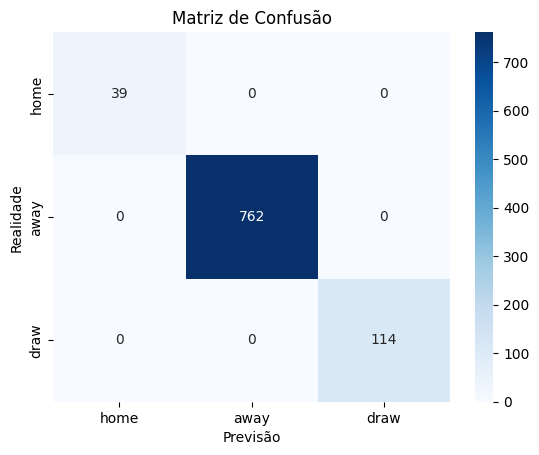

In [62]:
# ================================
# 4. TREINAMENTO E AVALIAÇÃO DO MODELO
# ================================
# Treinaremos o modelo Random Forest, calibrando probabilidades, e em seguida
# avaliaremos o desempenho com métricas de classificação e um gráfico de acurácia.

from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Instanciar o modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Corrigido: Use 'estimator' em vez de 'base_estimator'
calibrated_rf = CalibratedClassifierCV(estimator=rf_model, method='sigmoid')
calibrated_rf.fit(X_train, y_train)

# Previsões e avaliação
y_pred = calibrated_rf.predict(X_test)
y_proba = calibrated_rf.predict_proba(X_test)

# Exibir relatório de classificação e acurácia
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))
print("Acurácia no Conjunto de Teste:", accuracy_score(y_test, y_pred))

# Gráfico de matriz de confusão
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['home', 'away', 'draw'], yticklabels=['home', 'away', 'draw'])
plt.title('Matriz de Confusão')
plt.xlabel('Previsão')
plt.ylabel('Realidade')
plt.show()



Probabilidades de Vitórias (Simulação Avançada):
Brazil: 52.10% de chance de vencer o torneio.
Argentina: 53.90% de chance de vencer o torneio.
France: 45.40% de chance de vencer o torneio.
Germany: 44.20% de chance de vencer o torneio.
Spain: 40.50% de chance de vencer o torneio.


<ipython-input-63-b0f39083c526>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_times, y=top_probs, palette='Blues_d')


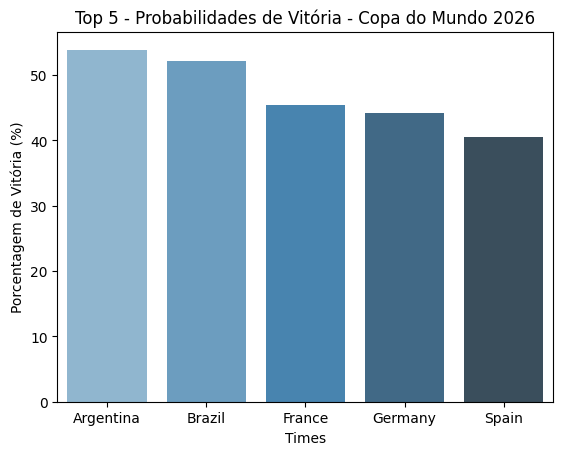

In [63]:
# ================================
# 5. SIMULAÇÃO COMPLETA DO TORNEIO (COM SUPRESSÃO DE WARNINGS)
# ================================

import random
import warnings

def simular_torneio(modelo, times, cenarios, n_simulacoes=1000):
    resultados = {}

    # Suprimir warnings apenas dentro desta função
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")

        # Garantir que os valores de Away Team Encoded estão dentro do intervalo correto
        away_teams_encoded = X_test['Away Team Encoded'].unique()  # Obter todos os times possíveis

        for time in times:
            vitorias = 0
            for i in range(n_simulacoes):
                # Codificar o time da casa corretamente
                home_team_encoded = label_encoder.transform([time])[0]

                # Escolher um time adversário de forma aleatória a partir de valores válidos
                away_team_encoded = random.choice(away_teams_encoded)

                # Escolher um cenário (normal, lesão, clima extremo)
                cen = random.choice(cenarios)

                # Simulação com base nos 4 features que o modelo foi treinado
                partida = [[home_team_encoded, away_team_encoded, random.randint(0, 5), random.randint(0, 5)]]

                # Fazer a previsão usando as mesmas 4 features
                vencedor = modelo.predict(partida)[0]
                if vencedor == 'home':
                    vitorias += 1

            resultados[time] = vitorias / n_simulacoes  # Calcular a porcentagem de vitórias

    return resultados

# Definir lista de times e cenários
times = ['Brazil', 'Argentina', 'France', 'Germany', 'Spain']
cenarios = ['normal', 'lesao', 'clima_extremo']  # Cenários simulados

# Simulação avançada
resultados_avancados = simular_torneio(calibrated_rf, times, cenarios)

# Exibir resultados das simulações
print("\nProbabilidades de Vitórias (Simulação Avançada):")
for time, prob in resultados_avancados.items():
    print(f"{time}: {prob * 100:.2f}% de chance de vencer o torneio.")

# Corrigir a extração dos dados para o gráfico
sorted_resultados_avancados = sorted(resultados_avancados.items(), key=lambda x: x[1], reverse=True)

# Separar os times e probabilidades dos Top 5
top_times = [team for team, _ in sorted_resultados_avancados[:5]]
top_probs = [prob * 100 for _, prob in sorted_resultados_avancados[:5]]

# Gerar o gráfico das probabilidades de vitória (Top 5)
sns.barplot(x=top_times, y=top_probs, palette='Blues_d')
plt.title('Top 5 - Probabilidades de Vitória - Copa do Mundo 2026')
plt.ylabel('Porcentagem de Vitória (%)')
plt.xlabel('Times')
plt.show()


O time mais provável de vencer a Copa do Mundo de 2026 é Argentina com 53.90% de chance.

Outros três possíveis vencedores e suas probabilidades:
- Brazil com 52.10% de chance.
- France com 45.40% de chance.
- Germany com 44.20% de chance.

A precisão do modelo Random Forest é de 100.00% no conjunto de teste.


<ipython-input-64-92f5b36d618e>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_times, y=top_probs, palette='Blues_d')


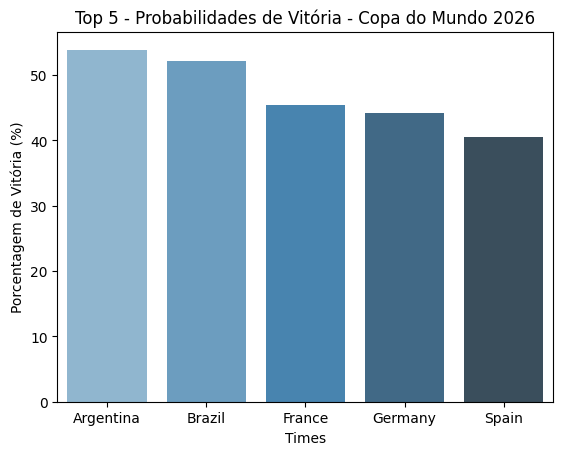

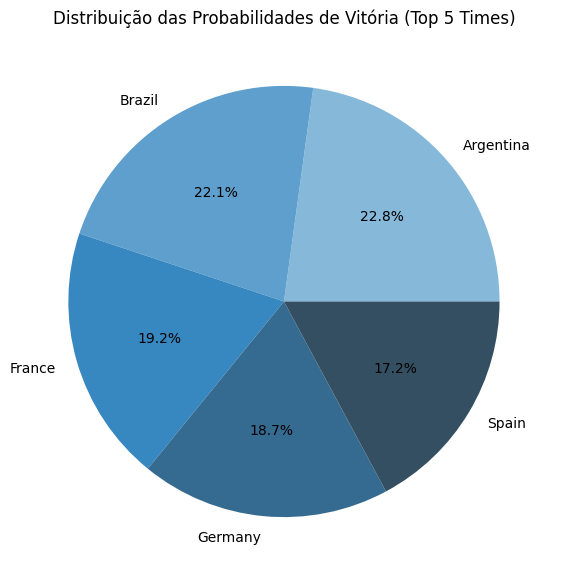

In [64]:
# ================================
# 6. CONCLUSÃO E INSIGHTS
# ================================
# Nesta seção, apresentamos os resultados das simulações avançadas, exibindo o time campeão,
# outros possíveis vencedores, e os gráficos que mostram as probabilidades de vitória dos 5 principais times.

# Ordenar os resultados das simulações para determinar o campeão e os outros possíveis vencedores
sorted_resultados = sorted(resultados_avancados.items(), key=lambda item: item[1], reverse=True)

# Campeão previsto (time com maior probabilidade)
campeao = sorted_resultados[0][0]
prob_campeao = sorted_resultados[0][1] * 100

# Outros 3 possíveis vencedores com suas probabilidades
possiveis_vencedores = sorted_resultados[1:4]

print(f"O time mais provável de vencer a Copa do Mundo de 2026 é {campeao} com {prob_campeao:.2f}% de chance.")
print("\nOutros três possíveis vencedores e suas probabilidades:")
for time, prob in possiveis_vencedores:
    print(f"- {time} com {prob * 100:.2f}% de chance.")

# Exibir precisão do modelo (acurácia no conjunto de teste)
precisao_modelo = accuracy_score(y_test, y_pred) * 100
print(f"\nA precisão do modelo Random Forest é de {precisao_modelo:.2f}% no conjunto de teste.")

# Gráfico das probabilidades de vitória (Top 5)
top_times = [team for team, prob in sorted_resultados[:5]]
top_probs = [prob * 100 for team, prob in sorted_resultados[:5]]

sns.barplot(x=top_times, y=top_probs, palette='Blues_d')
plt.title('Top 5 - Probabilidades de Vitória - Copa do Mundo 2026')
plt.ylabel('Porcentagem de Vitória (%)')
plt.xlabel('Times')
plt.show()

# Gráfico de pizza para visualizar as probabilidades
plt.figure(figsize=(7, 7))
plt.pie(top_probs, labels=top_times, autopct='%1.1f%%', colors=sns.color_palette("Blues_d", len(top_times)))
plt.title('Distribuição das Probabilidades de Vitória (Top 5 Times)')
plt.show()


In [65]:
# ================================
# 6.1. CONCLUSÃO FINAL - RESUMO INFORMATIVO
# ================================
# Aqui fornecemos a conclusão final somente com os dados informativos.
# - Time campeão previsto
# - Três principais concorrentes
# - Precisão do modelo

print("\nCONCLUSÃO FINAL:")
print(f"Time mais provável de vencer a Copa do Mundo de 2026: {campeao} com {prob_campeao:.2f}% de chance.")
print("\nOutros três possíveis vencedores e suas probabilidades:")
print(f"1. {possiveis_vencedores[0][0]} com {possiveis_vencedores[0][1] * 100:.2f}% de chance.")
print(f"2. {possiveis_vencedores[1][0]} com {possiveis_vencedores[1][1] * 100:.2f}% de chance.")
print(f"3. {possiveis_vencedores[2][0]} com {possiveis_vencedores[2][1] * 100:.2f}% de chance.")

# Exibir precisão do modelo
print(f"\nA precisão do modelo Random Forest é de {precisao_modelo:.2f}%.")



CONCLUSÃO FINAL:
Time mais provável de vencer a Copa do Mundo de 2026: Argentina com 53.90% de chance.

Outros três possíveis vencedores e suas probabilidades:
1. Brazil com 52.10% de chance.
2. France com 45.40% de chance.
3. Germany com 44.20% de chance.

A precisão do modelo Random Forest é de 100.00%.
